<a href="https://colab.research.google.com/github/wira29/PCVK_Ganjil_2023/blob/main/28_WiradarmaNB_week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nama   : Wiradarma Nurmagika Bagaskara
## NIM    : 2141720184
## Kelas  : 3H

## Buat Gamma Correction sesuai dengan petunjuk berikut
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


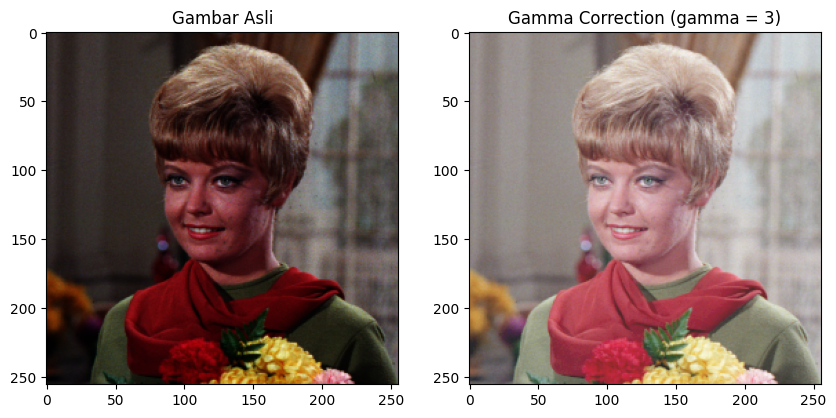

In [26]:
import cv2 as cv

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow  (original[y,x,c] / 255, (1 / gamma)), 0, 255)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(gamma_image, cv.COLOR_BGR2RGB))
plt.title(f'Gamma Correction (gamma = {gamma})')

plt.show()

## Buat Simulasi Image Depth
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27 = 128, dst.

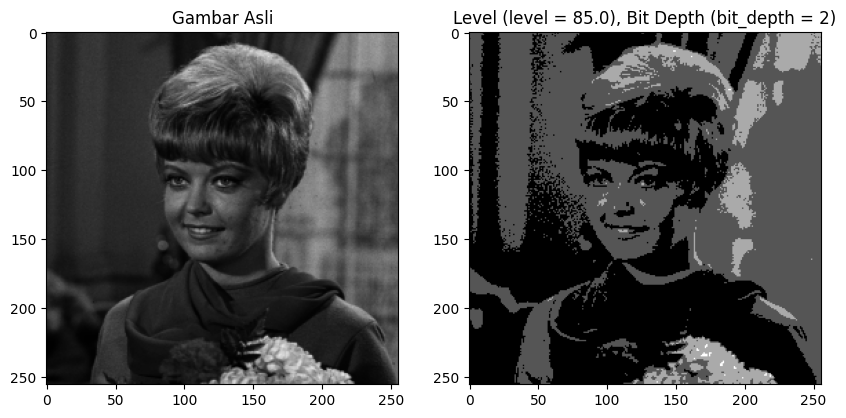

In [34]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y,x] = np.clip(np.round(original[y, x] / level) * level, 0, 255)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.title('Gambar Asli')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(depth_image, cv.COLOR_BGR2RGB))
plt.title(f'Level (level = {level}), Bit Depth (bit_depth = {bit_depth})')

plt.show()

## Buat modul Average Denoising
Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).

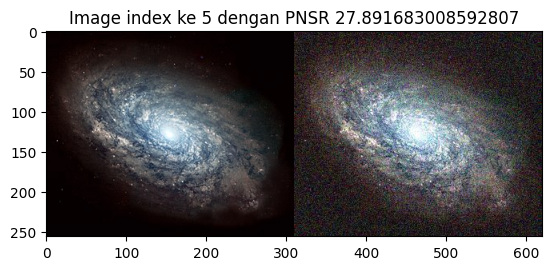

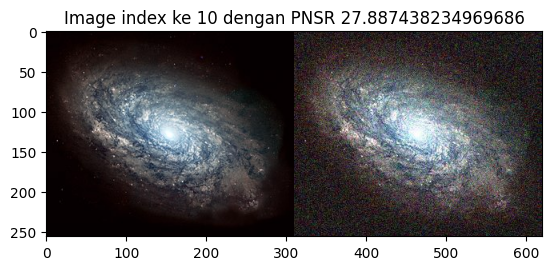

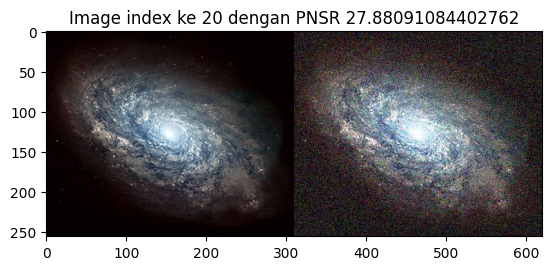

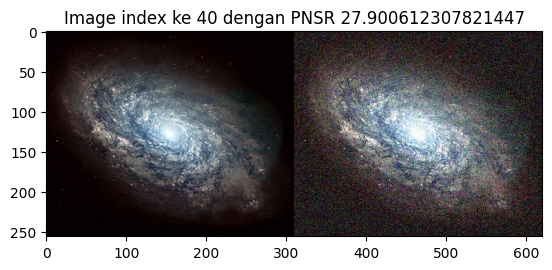

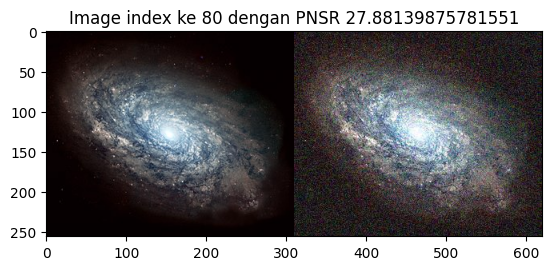

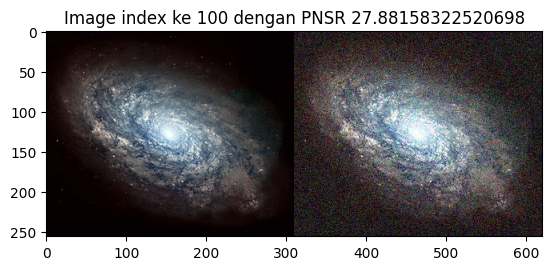

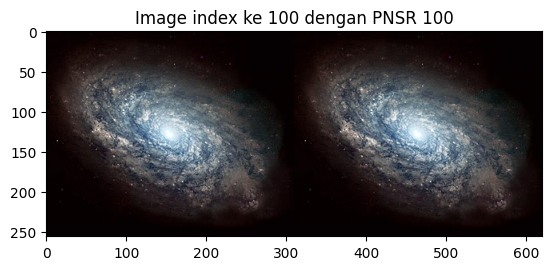

In [169]:
import glob

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

# cv_img = []
# for img in glob.glob('/content/drive/MyDrive/PCVK/images/noises/*.jpg'):
#   n= cv.imread(img)
#   cv_img.append(n)

original = cv.imread('/content/drive/MyDrive/PCVK/images/galaxy.jpg')
# print(PSNR(original, original))

list_img = [5, 10, 20, 40, 80, 100]
for index, img in enumerate(list_img):
  noise = cv.imread(f'/content/drive/MyDrive/PCVK/images/noises/{img}.jpg')
  pnsr = PSNR(original, noise)
  final_frame = cv.hconcat((original, noise))
  plt.imshow(final_frame)
  plt.title(f"Image index ke {img} dengan PNSR {pnsr}")
  plt.show()


pnsr = PSNR(original, original)
final_frame = cv.hconcat((original, original))
plt.imshow(final_frame)
plt.title(f"Image index ke {img} dengan PNSR {pnsr}")
plt.show()


Kesimpulannya adalah semakin nilai PNSR mendekati 100, maka noise dari gambar tersebut semakin sedikit

Buat image masking untuk image berikut. Image kiri adalah image asli (image KTP), sedangkan image paling kanan adalah hasilnya:

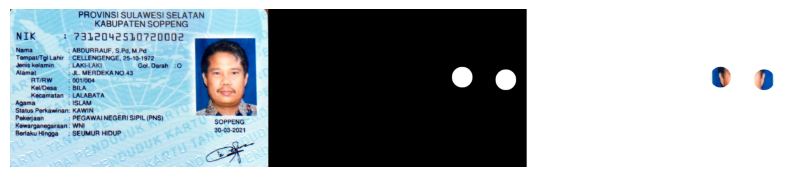

In [161]:
original_image = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/images/KTP.jpeg'), cv.COLOR_BGR2RGB)

center1 = (600, 210)
radius1 = 32
center2 = (735, 218)
radius2 = 32

mask = np.zeros_like(original_image)
cv.circle(mask, center1, radius1, (255, 255, 255), -1)
cv.circle(mask, center2, radius2, (255, 255, 255), -1)

masked_image = cv.bitwise_and(~original_image, mask)

plt.figure(figsize=(10, 5))
final_frame = cv.hconcat((original_image, mask, ~masked_image))
plt.imshow(final_frame)
plt.axis("off")
plt.show()


Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

#### NOT (komplemen)

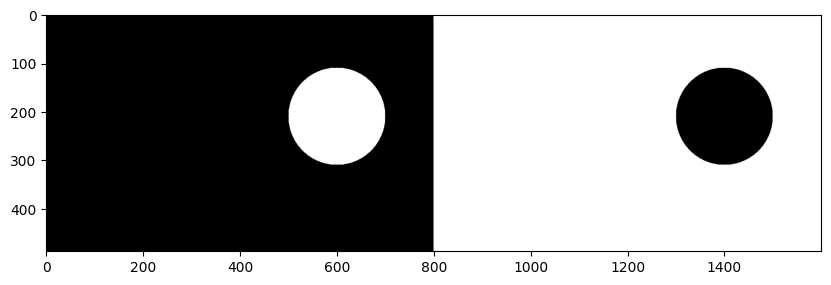

In [165]:
original_image = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/images/KTP.jpeg'), cv.COLOR_BGR2RGB)

center1 = (600, 210)
radius1 = 100

mask = np.zeros_like(original_image)
cv.circle(mask, center1, radius1, (255, 255, 255), -1)

masked_image = ~mask

plt.figure(figsize=(10, 5))
final_frame = cv.hconcat((mask, masked_image))
plt.imshow(final_frame)
plt.show()

NOT akan membalikkan / inverse gambar

#### OR (Atau)

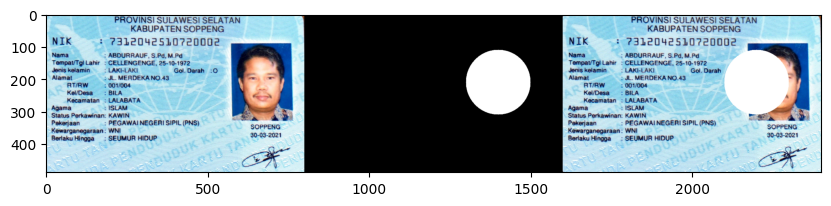

In [144]:
original_image = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/images/KTP.jpeg'), cv.COLOR_BGR2RGB)

center1 = (600, 210)
radius1 = 100

mask = np.zeros_like(original_image)
cv.circle(mask, center1, radius1, (255, 255, 255), -1)

masked_image = cv.bitwise_or(original_image, mask)

plt.figure(figsize=(10, 5))
final_frame = cv.hconcat((original_image, mask, masked_image))
plt.imshow(final_frame)
plt.show()

#### AND (Dan)

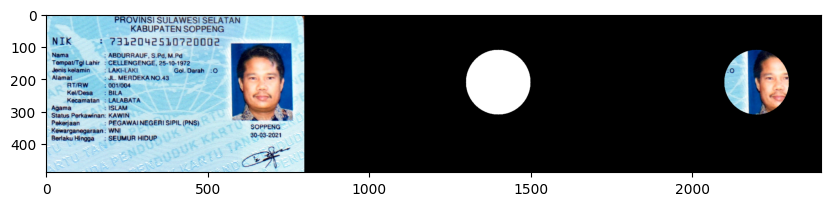

In [139]:
original_image = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/images/KTP.jpeg'), cv.COLOR_BGR2RGB)

center1 = (600, 210)
radius1 = 100

mask = np.zeros_like(original_image)
cv.circle(mask, center1, radius1, (255, 255, 255), -1)

masked_image = cv.bitwise_and(original_image, mask)

plt.figure(figsize=(10, 5))
final_frame = cv.hconcat((original_image, mask, masked_image))
plt.imshow(final_frame)
plt.show()

AND akan menghasilkan shape yang beririsan diantara 2 gambar

#### NAND (Not And)

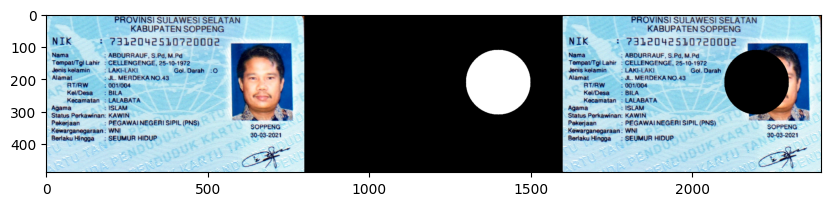

In [167]:
original_image = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/images/KTP.jpeg'), cv.COLOR_BGR2RGB)

center1 = (600, 210)
radius1 = 100

mask = np.zeros_like(original_image)
cv.circle(mask, center1, radius1, (255, 255, 255), -1)

masked_image = original_image & ~mask

plt.figure(figsize=(10, 5))
final_frame = cv.hconcat((original_image, mask, masked_image))
plt.imshow(final_frame)
plt.show()

#### XOR (Exlusive Or)

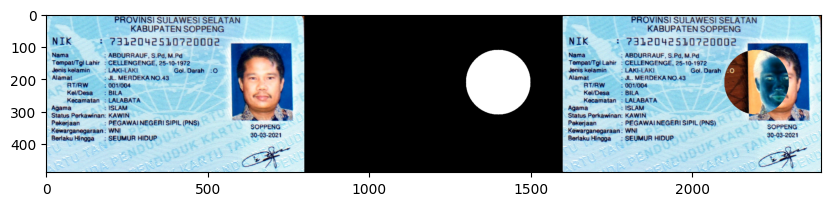

In [162]:
original_image = cv.cvtColor(cv.imread('/content/drive/MyDrive/PCVK/images/KTP.jpeg'), cv.COLOR_BGR2RGB)

center1 = (600, 210)
radius1 = 100

mask = np.zeros_like(original_image)
cv.circle(mask, center1, radius1, (255, 255, 255), -1)

masked_image = cv.bitwise_xor(original_image, mask)

plt.figure(figsize=(10, 5))
final_frame = cv.hconcat((original_image, mask, masked_image))
plt.imshow(final_frame)
plt.show()